In [1]:
# Package imports
import numpy as np
import copy
import matplotlib.pyplot as plt
from testCases_v2 import *
from public_tests import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
    X, Y = load_planar_dataset()

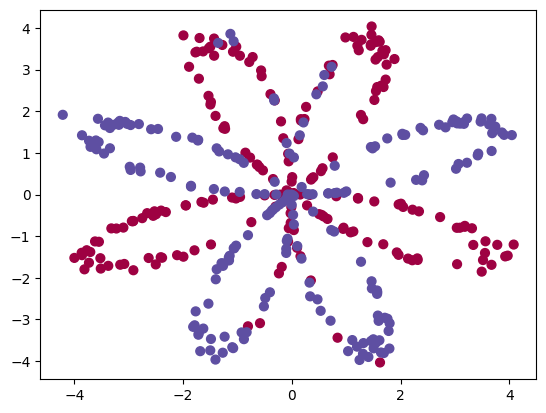

In [3]:
# VisuaAClize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [4]:
# NORMALIZO ENTRADAS
X=X/5
print(X)

[[ 2.40888458e-01  3.17419808e-02  1.90494392e-02  6.98356949e-02
   1.38830076e-01  3.24130076e-01  3.07712450e-01  7.26171281e-03
   9.49182217e-02  3.31391656e-02  3.32892498e-01  1.68057144e-01
   5.23390325e-02  4.63229792e-02  3.16026039e-01  1.27101990e-03
   1.36122084e-01  2.42800864e-02  2.26562523e-01  3.23011785e-01
   3.32908883e-02  3.44876483e-01  3.77334492e-01  3.44654455e-01
   3.09322663e-01  1.96918080e-01  2.90626690e-01  1.49808678e-01
   2.90096683e-01  3.28575729e-01  2.56282975e-01  3.19148208e-01
   2.92596588e-01  2.93258096e-01  3.08697922e-01  3.14026833e-01
   2.45990808e-01  2.62284691e-01 -3.98729106e-01  7.89129504e-02
   3.03430898e-01  3.38338278e-01  3.48373371e-01 -5.82746763e-01
   1.50430180e-01  3.37074606e-01  7.42320477e-02 -7.46067769e-01
   7.04968160e-02 -2.97388412e-01 -1.49058083e-01  1.12761488e-01
   2.54186358e-01  1.07026721e-01 -3.42660749e-02 -5.00394587e-01
  -5.26550897e-01 -6.31123099e-01 -4.22044980e-01 -7.02607126e-01
  -7.04036

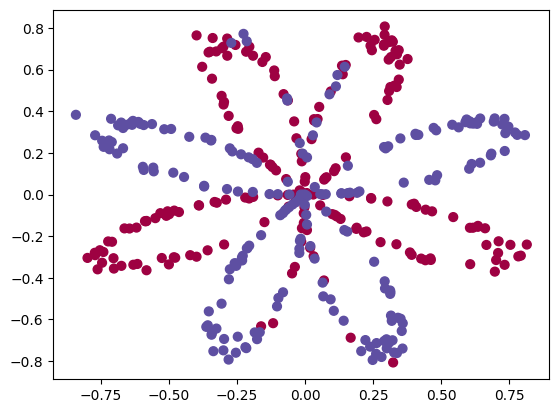

In [5]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [6]:
# (≈ 3 lines of code)
# shape_X = ...
# shape_Y = ...
# training set size
# m = ...
# YOUR CODE STARTS HERE
shape_X= X.shape
shape_Y=Y.shape
m=X.shape[1]

# YOUR CODE ENDS HERE

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


In [7]:
X

array([[ 2.40888458e-01,  3.17419808e-02,  1.90494392e-02,
         6.98356949e-02,  1.38830076e-01,  3.24130076e-01,
         3.07712450e-01,  7.26171281e-03,  9.49182217e-02,
         3.31391656e-02,  3.32892498e-01,  1.68057144e-01,
         5.23390325e-02,  4.63229792e-02,  3.16026039e-01,
         1.27101990e-03,  1.36122084e-01,  2.42800864e-02,
         2.26562523e-01,  3.23011785e-01,  3.32908883e-02,
         3.44876483e-01,  3.77334492e-01,  3.44654455e-01,
         3.09322663e-01,  1.96918080e-01,  2.90626690e-01,
         1.49808678e-01,  2.90096683e-01,  3.28575729e-01,
         2.56282975e-01,  3.19148208e-01,  2.92596588e-01,
         2.93258096e-01,  3.08697922e-01,  3.14026833e-01,
         2.45990808e-01,  2.62284691e-01, -3.98729106e-01,
         7.89129504e-02,  3.03430898e-01,  3.38338278e-01,
         3.48373371e-01, -5.82746763e-01,  1.50430180e-01,
         3.37074606e-01,  7.42320477e-02, -7.46067769e-01,
         7.04968160e-02, -2.97388412e-01, -1.49058083e-0

In [8]:
X.shape

(2, 400)

In [9]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    #(≈ 3 lines of code)
    # n_x = ... 
    # n_h = ...
    # n_y = ... 
    # YOUR CODE STARTS HERE
    n_x=X.shape[0]
    n_h=4
    n_y=Y.shape[0]
    
    # YOUR CODE ENDS HERE
    return (n_x, n_h, n_y)


In [10]:
t_X, t_Y = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(t_X, t_Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

layer_sizes_test(layer_sizes)

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2
All tests passed!


In [11]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """    
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    W1=np.random.randn(n_h, n_x) * 0.01
    b1=np.zeros((n_h, 1))
    W2=np.random.randn(n_y, n_h) * 0.01
    b2=np.zeros((n_y, 1))
    
    # YOUR CODE ENDS HERE

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [12]:
np.random.seed(2)
n_x, n_h, n_y = initialize_parameters_test_case()
parameteres=initialize_parameters(n_x, n_h, n_y)

In [13]:
np.random.seed(2)
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

initialize_parameters_test(initialize_parameters)

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]
All tests passed!


In [14]:
def relu(x):
    return np.maximum(0, x)

In [15]:
 # GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    #(≈ 1 line of code)
    # s = ...
    # YOUR CODE STARTS HERE

    s=1/(1+np.exp(-z))
    # YOUR CODE ENDS HERE

    return s

In [16]:
# GRADED FUNCTION:forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    W1=parameters['W1']
    b1=parameters['b1']
    W2=parameters['W2']
    b2=parameters['b2']
    # YOUR CODE ENDS HERE
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    # (≈ 4 lines of code)
    # Z1 = ...
    # A1 = ...
    # Z2 = ...
    # A2 = ...
    # YOUR CODE STARTS HERE
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    #A1=np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    # YOUR CODE ENDS HERE
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [17]:
t_X, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(t_X, parameters)
print("A2 = " + str(A2))

#forward_propagation_test(forward_propagation)

A2 = [[0.21136026 0.21136762 0.21138822]]


In [18]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1] # number of examples

    # Compute the cross-entropy cost
    # (≈ 2 lines of code)
    # logprobs = ...
    # cost = ...
    # YOUR CODE STARTS HERE
    logprobs = np.multiply(np.log(A2),Y) +np.multiply((1-Y), np.log(1-A2))
    cost = -(1/m)* np.sum(logprobs)
    
    # YOUR CODE ENDS HERE
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    
    return cost

In [19]:
A2, t_Y = compute_cost_test_case()
cost = compute_cost(A2, t_Y)
print("cost = " + str(compute_cost(A2, t_Y)))

compute_cost_test(compute_cost)

cost = 0.6930587610394646
All tests passed!


In [20]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    #(≈ 2 lines of code)
    # W1 = ...
    # W2 = ...
    # YOUR CODE STARTS HERE
    W1=parameters['W1']
    W2=parameters['W2']
    
    # YOUR CODE ENDS HERE
        
    # Retrieve also A1 and A2 from dictionary "cache".
    #(≈ 2 lines of code)

    # YOUR CODE STARTS HERE
    A1 = cache['A1']
    A2 = cache['A2']
    # YOUR CODE ENDS HERE
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    #(≈ 6 lines of code, corresponding to 6 equations on slide above)
    # dZ2 = ...
    # dW2 = ...
    # db2 = ...
    # dZ1 = ...
    # dW1 = ...
    # db1 = ...
    # YOUR CODE STARTS HERE
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    #dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dZ1 = np.multiply(np.dot(W2.T, dZ2), np.int64(A1 > 0))
        
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    # YOUR CODE ENDS HERE
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [21]:
parameters, cache, t_X, t_Y = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, t_X, t_Y)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

#backward_propagation_test(backward_propagation)

dW1 = [[ 1.47521591e-04 -5.58175132e-03]
 [ 9.26556481e-04 -1.31073256e-03]
 [-7.68951441e-05  2.90946951e-03]
 [-4.18586701e-03  1.28856825e-02]]
db1 = [[-3.45386063e-07]
 [-1.51458401e-03]
 [ 1.80031349e-07]
 [-7.63709969e-03]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [22]:
# GRADED FUNCTION: update_parameters

#def update_parameters(parameters, grads,learning_rate = 0.5):
def update_parameters(parameters, grads, num, learning_rate = 1.8):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve a copy of each parameter from the dictionary "parameters". Use copy.deepcopy(...) for W1 and W2
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    W1=parameters['W1']
    b1=parameters['b1']
    W2=parameters['W2']
    b2=parameters['b2']
    # YOUR CODE ENDS HERE
    
    # Retrieve each gradient from the dictionary "grads"
    #(≈ 4 lines of code)
    # dW1 = ...
    # db1 = ...
    # dW2 = ...
    # db2 = ...
    # YOUR CODE STARTS HERE
    dW1=grads['dW1']
    db1=grads['db1']
    dW2=grads['dW2']    
    db2=grads['db2']
    
    # YOUR CODE ENDS HERE
    
    # Update rule for each parameter
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    new_learning_rate=(np.power(0.9998, num))*learning_rate
    W1=W1 - new_learning_rate*dW1
    b1=b1 - new_learning_rate*db1
    W2=W2 - new_learning_rate*dW2
    b2=b2 - new_learning_rate*db2
    
    # YOUR CODE ENDS HERE
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters,new_learning_rate

In [23]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    #(≈ 1 line of code)
    # parameters = ...
    # YOUR CODE STARTS HERE
    parameters = initialize_parameters(n_x, n_h, n_y)
    # YOUR CODE ENDS HERE
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        #(≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        # A2, cache = ...
       
        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        # cost = ...
        
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        # grads = ...
                 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        # parameters = ...
        
        # YOUR CODE STARTS HERE
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        #parameters = update_parameters(parameters, grads)
        [parameters,new_learning_rate] = update_parameters(parameters, grads,i)
        # YOUR CODE ENDS HERE
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            print("Learning rate%i: %f" %(i, new_learning_rate))
    return parameters

In [24]:
#nn_model_test(nn_model)

In [25]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    #(≈ 2 lines of code)
    # A2, cache = ...
    # predictions = ...
    # YOUR CODE STARTS HERE
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)

    # YOUR CODE ENDS HERE
    
    return predictions

In [26]:
parameters, t_X = predict_test_case()

predictions = predict(parameters, t_X)
print("Predictions: " + str(predictions))

predict_test(predict)

Predictions: [[1. 0. 1.]]
All tests passed!


Cost after iteration 0: 0.693149
Learning rate0: 1.800000
Cost after iteration 1000: 0.591483
Learning rate1000: 1.473686
Cost after iteration 2000: 0.576764
Learning rate2000: 1.206528
Cost after iteration 3000: 0.573397
Learning rate3000: 0.987802
Cost after iteration 4000: 0.572089
Learning rate4000: 0.808727
Cost after iteration 5000: 0.571616
Learning rate5000: 0.662117
Cost after iteration 6000: 0.571415
Learning rate6000: 0.542085
Cost after iteration 7000: 0.571315
Learning rate7000: 0.443812
Cost after iteration 8000: 0.571249
Learning rate8000: 0.363356
Cost after iteration 9000: 0.571218
Learning rate9000: 0.297484
{'W1': array([[ 0.90762996,  0.43267101],
       [-2.65678127, -5.28870968],
       [-2.97687598, -4.63890393],
       [-1.4826347 , -4.77361683]]), 'b1': array([[ 0.57250212],
       [-3.58136411],
       [-1.2166382 ],
       [-0.88024892]]), 'W2': array([[-0.94545681,  6.78819073, -4.87176439,  4.34190591]]), 'b2': array([[0.50133745]])}


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

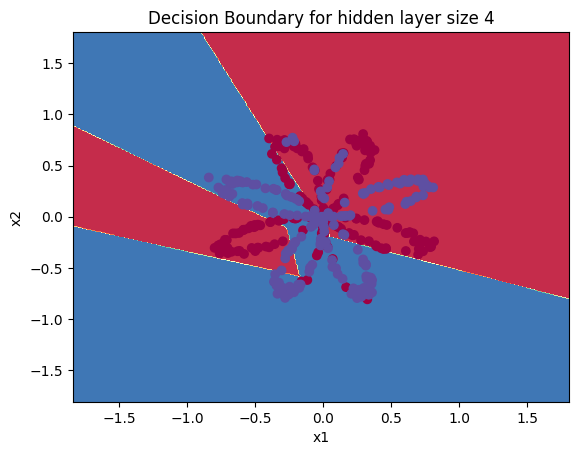

In [27]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)
print(parameters)
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [28]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 69%


C:\Users\Jorge\AppData\Local\Temp\ipykernel_4296\1304927518.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')
